In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('./data/DailyDelhiClimateTrain.csv') 
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
df_test = pd.read_csv('./data/DailyDelhiClimateTest.csv') 

df_test["datetime"] = pd.to_datetime(df_test["date"])
df["datetime"] = pd.to_datetime(df["date"])



df_test

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017-01-01
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017-01-02
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017-01-03
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017-01-04
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017-01-05
...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,2017-04-20
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,2017-04-21
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017-04-22
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,2017-04-23


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Mean Pressure')]

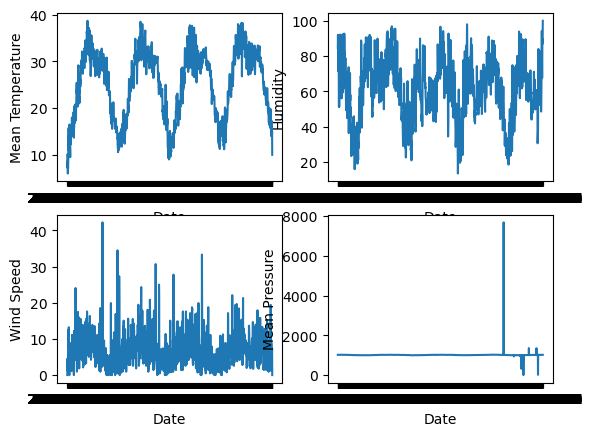

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(df.date, df.meantemp)
axs[0, 0].set(xlabel= 'Date', ylabel='Mean Temperature')

axs[0, 1].plot(df.date, df.humidity)
axs[0, 1].set(xlabel= 'Date', ylabel='Humidity')

axs[1, 0].plot(df.date, df.wind_speed)
axs[1, 0].set(xlabel= 'Date', ylabel='Wind Speed')

axs[1, 1].plot(df.date, df.meanpressure)
axs[1, 1].set(xlabel= 'Date', ylabel='Mean Pressure')


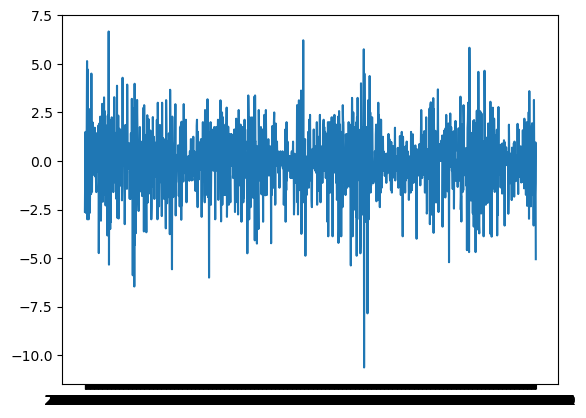

In [18]:
df['meantemp_change'] = df.meantemp.diff()
plt.plot(df.date, df.meantemp_change)
plt.show()

In [33]:
from hmmlearn import hmm

X = df[["meantemp_change"]].values
X = X[1:]
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 100, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)


In [20]:
print("Unique states:")
print(states)

Unique states:
[1 2 4 0 3]


In [21]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[3.25593770e-090 1.00000000e+000 1.11547318e-049 0.00000000e+000
 6.52210767e-118]


In [22]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[9.66530892e-08 8.84787092e-02 2.42230762e-03 6.40883593e-01
  2.68215293e-01]
 [1.94967184e-03 3.18851665e-01 6.33508951e-01 5.55561364e-07
  4.56891559e-02]
 [1.19100590e-06 9.23219831e-01 7.60520774e-02 7.21168582e-04
  5.73247958e-06]
 [1.63621689e-08 1.17004073e-05 3.58301281e-08 2.98720146e-01
  7.01268101e-01]
 [9.00963391e-01 1.18229804e-02 5.93855557e-07 1.48208436e-06
  8.72115532e-02]]


In [23]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[ 0.38611078]
 [-0.60719023]
 [ 0.93077352]
 [-0.05238217]
 [-0.36624663]]


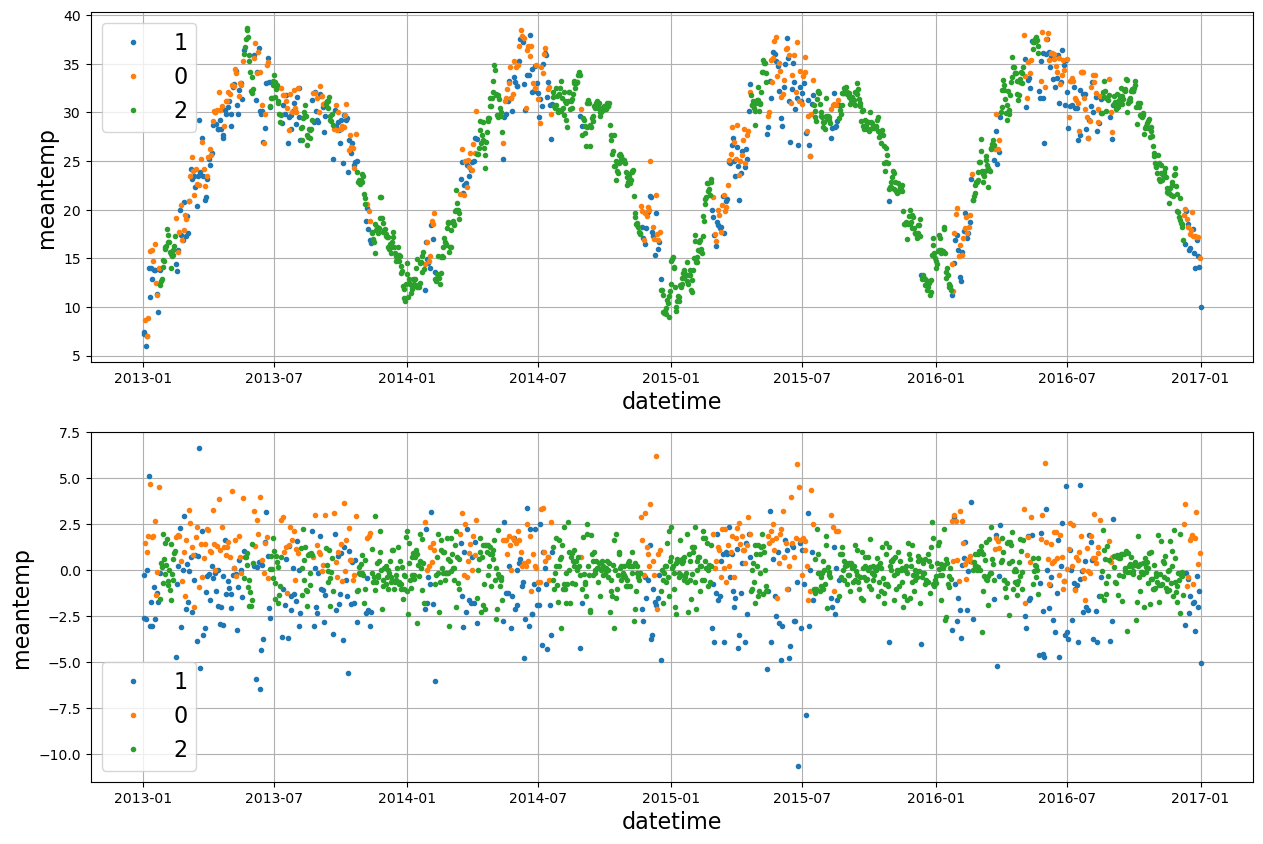

In [34]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
df_ = df[1:]
for i in states:
    want = (Z == i)
    x = df_["datetime"].iloc[want]
    y = df_["meantemp"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("meantemp", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = df_["datetime"].iloc[want]
    y = df_["meantemp_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("meantemp", fontsize=16)
plt.show()